# Car Price Prediction

The goal of this project is to develop a machine learning model to accurately predict the prices of used cars based on features such as Car_ID,
 Brand,
 Model,
 Year and more. This will help users estimate the market value of a used car given its attributes. The model's performance will be assessed using appropriate accuracy metrics.

Car_ID: A unique identifier for each car listing.

Brand: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford, etc.).

Model: The model of the car (e.g., Camry, Civic, Mustang, etc.).

Year: The manufacturing year of the car.

Kilometers_Driven: The total kilometers driven by the car.

Fuel_Type: The type of fuel used by the car (e.g., Petrol, Diesel, Electric, etc.).

Transmission: The transmission type of the car (e.g., Manual, Automatic).

Owner_Type: The number of previous owners of the car (e.g., First, Second, Third).

Mileage: The fuel efficiency of the car in kilometers per liter.

Engine: The engine capacity of the car in CC (Cubic Centimeters).

Power: The maximum power output of the car in bhp (Brake Horsepower).

Seats: The number of seats available in the car.

Price: The selling price of the car in INR (Indian Rupees), which is the target variable to predict.

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Data Collection and Processing

In [2]:
car_dataset=pd.read_csv("cars.csv")
car_dataset

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [3]:
car_dataset.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
car_dataset.shape

(100, 13)

In [28]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [29]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [30]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Owner_Type.value_counts())

Petrol    52
Diesel    48
Name: Fuel_Type, dtype: int64
Automatic    57
Manual       43
Name: Transmission, dtype: int64
First     44
Second    43
Third     13
Name: Owner_Type, dtype: int64


# Encoding the Categorical Data

In [31]:
# encoding the "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1}},inplace=True)
# encoding the "Transmission" Column
car_dataset.replace({'Transmission':{'Automatic':0,'Manual':1}},inplace=True)
# encoding the "Owner_Type" Column
car_dataset.replace({'Owner_Type':{'First':0,'Second':1,'Third':2}},inplace=True)

In [53]:
car_dataset.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,0,1,0,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,0,0,1,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,0,0,0,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,1,1,2,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,1,0,1,18,1999,194,5,850000


# Splitting the Features and Target

In [54]:
X=car_dataset.drop(['Car_ID','Brand','Model','Price'],axis=1)
Y=car_dataset['Price']

In [55]:
X

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2018,50000,0,1,0,15,1498,108,5
1,2019,40000,0,0,1,17,1597,140,5
2,2017,20000,0,0,0,10,4951,395,4
3,2020,30000,1,1,2,23,1248,74,5
4,2016,60000,1,0,1,18,1999,194,5
...,...,...,...,...,...,...,...,...,...
95,2019,22000,1,0,0,16,1950,191,5
96,2017,38000,1,1,1,13,2755,171,7
97,2018,26000,0,1,2,18,1497,121,5
98,2019,24000,0,0,1,17,1497,113,5


In [56]:
Y

0      800000
1     1000000
2     2500000
3      600000
4      850000
       ...   
95    2900000
96    1400000
97     750000
98     850000
99     600000
Name: Price, Length: 100, dtype: int64

# Splitting Training and Testing Data

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=32)

In [62]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(80, 9) (80,) (20, 9) (20,)


In [38]:
y_train

55    2600000
88    2700000
26    3200000
42     500000
69     800000
       ...   
60     850000
71     700000
14     850000
92     650000
51     550000
Name: Price, Length: 80, dtype: int64

# Model Training

In [63]:
models = {
   'lr':LinearRegression(),
   'rf': RandomForestRegressor(),
   'dtr': DecisionTreeRegressor()
}

for name, mod in models.items():
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    print(f"{name} MSE: {mean_squared_error(y_test,y_pred)} score{r2_score(y_test,y_pred)}")

lr MSE: 417268470459.372 score0.5122376802836178
rf MSE: 127137575000.0 score0.8513836465121716
dtr MSE: 118625000000.0 score0.8613343464157339


# Select Model

In [74]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

In [91]:
print(y_pred)

[ 800000.  650000. 3200000.  750000. 2600000.  700000.  500000. 1400000.
 2800000. 1600000.  850000. 3200000. 1600000.  600000. 2400000. 3200000.
 4000000. 2700000. 1600000. 2000000.]


In [92]:
X_pred=dtr.predict(X_train)
X_pred

array([3200000., 2200000.,  650000.,  850000.,  750000., 2600000.,
       1300000., 1500000., 1000000.,  650000.,  700000.,  550000.,
        600000.,  800000.,  800000., 3500000., 2500000., 1600000.,
        850000.,  700000., 1800000., 1800000., 1900000., 3000000.,
       1400000., 2700000., 2800000., 1300000.,  450000., 1600000.,
        850000., 2800000.,  850000.,  650000.,  650000.,  550000.,
        600000., 3200000., 2400000., 1600000., 4000000.,  850000.,
        450000., 3500000., 1500000.,  600000.,  500000.,  900000.,
        750000., 3200000.,  500000., 2500000., 2000000., 2900000.,
        600000., 4000000.,  800000., 2900000., 2700000., 2300000.,
        500000., 1200000.,  500000.,  750000., 2800000.,  500000.,
        700000., 2000000.,  850000., 2700000.,  600000.,  550000.,
        700000., 2500000., 2700000., 1200000.,  650000.,  750000.,
        700000., 1800000.])

# Visualize Actual prices and Predicted prices

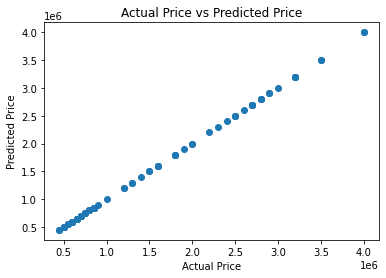

In [95]:
plt.scatter(y_train,X_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Making a Predictive System

In [76]:
input_data = (2019,40000,0,0,1,17,1597,140,5)
#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the data as we are predicting the label for only one instance
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)
prediction =dtr.predict(input_data_reshaped)
print(prediction) 

[1000000.]


C:\Users\User\.android\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [96]:
y_train[1]

1000000

# Conclusion

 In my project, I developed three different machine learning models: Linear Regression, Random Forest Regressor, and Decision Tree Regressor. To evaluate the performance of these models, I used two key metrics: Mean Squared Error (MSE) and R² score.

Model Evaluation Results:
Linear Regression

Mean Squared Error: 417

R² Score: 0.512

Random Forest Regressor:

Mean Squared Error: 127

R² Score: 0.85

Decision Tree Regressor:

Mean Squared Error: 118

R² Score: 0.86

Conclusion:

Based on the evaluation metrics, the Decision Tree Regressor model is the best performing model for this project. It has the lowest Mean Squared Error (118) and the highest R² score (0.86) among the three models. This indicates that the Decision Tree Regressor provides the most accurate predictions and explains the highest proportion of variance in the data.

